<a href="https://colab.research.google.com/github/rishabhk1501/Data-Analytics-Tasks/blob/main/session_23_task_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('dark_background')

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China.

In [3]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [7]:
df['Year'].unique()

array([2016, 2012, 2010, 2013, 2015, 2014, 2009, 2017, 2011, 2008])

In [8]:
df['Country'].unique()

array(['India', 'Cameroon', 'Pakistan', 'Uganda', 'Bangladesh', 'China',
       'Qatar', 'Mongolia', 'Kuwait', 'Saudi Arabia', 'Chile', 'Bahrain',
       'Iran', 'Bosnia and Herzegovina', 'South Africa', 'Ghana', 'Nepal',
       'Vietnam', 'Philippines', 'Indonesia', 'Colombia', 'Guatemala',
       'Croatia', 'North Macedonia', 'Peru', 'Turkey', 'Madagascar',
       'Mexico', 'Cuba', 'Lebanon', 'Poland', 'Taiwan', 'Czech Republic',
       'Republic of Korea', 'Costa Rica', 'Italy', 'Bulgaria', 'Israel',
       'Morocco', 'Thailand', 'El Salvador'], dtype=object)

In [89]:
temp = df[df['Country'].isin(['Iran','China'])].pivot_table(index='Year',columns='Country',values='PM2.5',aggfunc='sum')
temp = temp.reset_index()
temp

Country,Year,China,Iran
0,2012,NaN,37.0
1,2013,NaN,66.0
2,2014,2725.0,31.0
3,2015,425.0,NaN
4,2016,11106.0,1453.0


<Axes: title={'center': 'Yearly Trend of PM 2.5'}, xlabel='Year', ylabel='PM 2.5'>

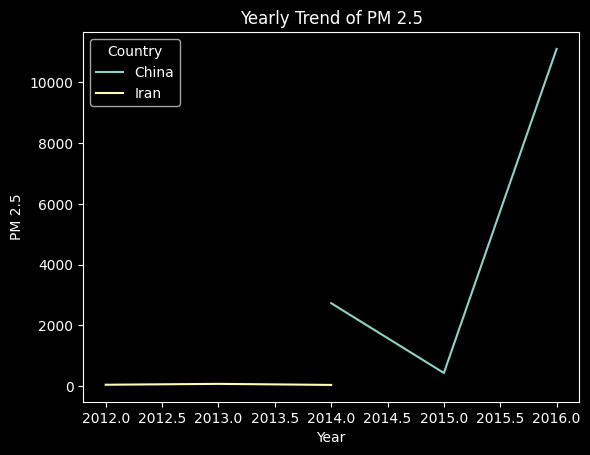

In [91]:
temp.plot(kind='line',x='Year',y=['China','Iran'],title='Yearly Trend of PM 2.5',ylabel='PM 2.5')

In [93]:
temp.shape[0]

5

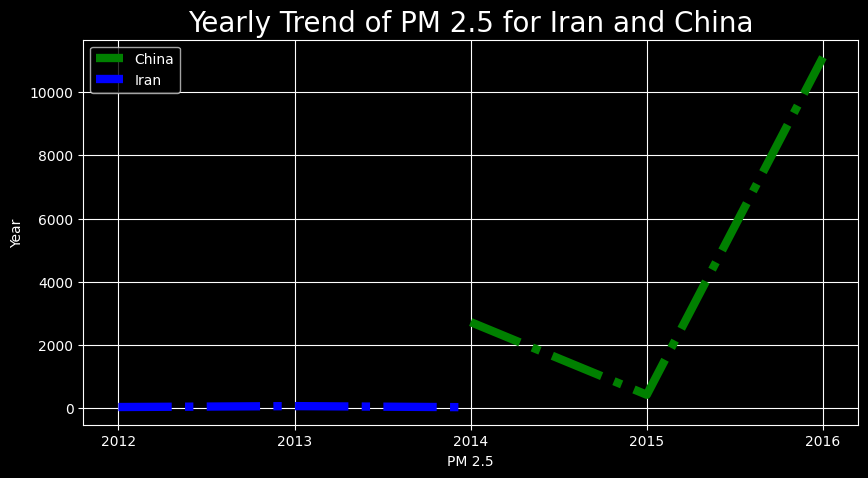

In [94]:
plt.figure(figsize=(10,5))
plt.plot(temp['China'],color='green',linestyle='dashdot',linewidth=6,label='China')
plt.plot(temp['Iran'],color='blue',linestyle='dashdot',linewidth=6,label='Iran')

plt.xlabel('PM 2.5')
plt.ylabel('Year')
plt.title('Yearly Trend of PM 2.5 for Iran and China',fontdict={'fontsize':20})
plt.xticks(np.arange(temp.shape[0]),temp['Year'].unique())
plt.legend()


plt.grid()
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability).

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.



##`Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.


###`Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

###`Problem-7`
Show sales of each product in march month as pie chart.
* Show Percentage value
* Give Title "Sales in March"
* Explode ToothPaste with shadow

###`Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

###`Problem-9` Show Quarter wise Sales data for all products as multi Bar chart.


###`Problem-10` Plot Stacked Bar chart quarter wise for each product.